In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./data\fifa.csv
./data\fifa_ variable_information.csv


In [2]:
pd.set_option("display.width",1000)
pd.set_option("display.max_columns",None)

In [6]:
df = pd.read_csv('fifa.csv')
print(df.shape,'\n\n')
df

(18207, 60) 




,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


### 1. Dropping irrelevant columns

In [4]:
tot_rows, tot_cols = df.shape
print(tot_rows, tot_cols)

18207 60


In [5]:
df_dropped = df.drop(columns=['Photo','Flag','Club Logo','Jersey Number'])
print(len(df_dropped.columns))

56


### 2. Further Cleaning 

In [6]:
# some helper functions and variables
# these are just to avoid few repetative code

def analyze_col(df, col_name,head=10):
    null_values = np.sum(df[col_name].isnull(),axis=0)
    print(df[col_name].info());print();
    print(df[col_name].head(head));print();
    for i,value in enumerate(null_values,1):
        print("Null values of column {} is {}, that is {:.2f}% of total datapoints/rows".format(i,value, value / tot_rows * 100));print();

In [7]:
# total null columns
nulls = np.sum(df_dropped.isnull(),axis=0)[lambda x: x > 0]
nulls.sort_values(ascending=False)

Loaned From                 16943
Release Clause               1564
Joined                       1553
Contract Valid Until          289
Club                          241
Position                       60
GKDiving                       48
GKHandling                     48
Dribbling                      48
Volleys                        48
ShortPassing                   48
HeadingAccuracy                48
Finishing                      48
Crossing                       48
Weight                         48
Height                         48
GKKicking                      48
FKAccuracy                     48
GKPositioning                  48
Body Type                      48
Work Rate                      48
Skill Moves                    48
Weak Foot                      48
International Reputation       48
Preferred Foot                 48
Curve                          48
LongPassing                    48
SlidingTackle                  48
LongShots                      48
StandingTackle

### **Loaned From**

In [8]:
analyze_col(df,['Loaned From'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 1 columns):
Loaned From    1264 non-null object
dtypes: object(1)
memory usage: 71.2+ KB
None

  Loaned From
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN

Null values of column 1 is 16943, that is 93.06% of total datapoints/rows



**Approach**
- It has high number(93%) of missing values and replacing wih a valid might not help attaining good results, so removing the whole column as such.

In [9]:
# Use df_drop1 for next
df_drop1 = df_dropped.drop(columns='Loaned From')
print(df_drop1.shape)

(18207, 55)


### Release Clause

In [10]:
analyze_col(df_drop1,['Release Clause'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 1 columns):
Release Clause    16643 non-null object
dtypes: object(1)
memory usage: 71.2+ KB
None

  Release Clause
0        €226.5M
1        €127.1M
2        €228.1M
3        €138.6M
4        €196.4M
5        €172.1M
6        €137.4M
7          €164M
8        €104.6M
9        €144.5M

Null values of column 1 is 1564, that is 8.59% of total datapoints/rows



**Approach**
- Release clause values are amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively.
- Check if all the columns are having € and get rid of it.
- Replace each 'K' or 'M' with respective 1000 or 1000000 values. 
- Almost 91% of the entries are not null hence replacing with a meaningful value (Median or mean) will be a good option.

In [11]:
# remove_dict = dict.fromkeys(['€','M','K'],"")
# remove_dict

In [12]:
def clean_release(x):
    x = str(x)
    if '€' in x:
        x = x.replace('€','')
    if "M" in x:
        m = 10 ** 6
        x = x.replace('M','')
        x = str(float(x) * m)
    if "K" in x:
        k = 10 ** 3
        x = x.replace('K','')
        x = str(float(x)*k)
    return x
    
# print(df_drop1['Release Clause'].tail(20))
df_drop1['Release Clause'] = df_drop1['Release Clause'].apply(clean_release)
df_drop1['Release Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: object

### **Joined**

In [13]:
analyze_col(df=df_drop1,col_name=['Joined'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 1 columns):
Joined    16654 non-null object
dtypes: object(1)
memory usage: 71.2+ KB
None

         Joined
0   Jul 1, 2004
1  Jul 10, 2018
2   Aug 3, 2017
3   Jul 1, 2011
4  Aug 30, 2015
5   Jul 1, 2012
6   Aug 1, 2012
7  Jul 11, 2014
8   Aug 1, 2005
9  Jul 16, 2014

Null values of column 1 is 1553, that is 8.53% of total datapoints/rows



**Approach**

- There are a few NaN values, removing those rows from the data.
- Since we dont require the exact date in this scenario, changing the formatting of the Date to year only format.

In [14]:
df_drop1.dropna(subset=['Joined'],inplace=True)

In [15]:
df_drop1['Joined'] = df_drop1['Joined'].apply(lambda x: str(x)[-4:])

### Contract Valid Until

In [16]:
analyze_col(df_drop1,['Contract Valid Until'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 1 columns):
Contract Valid Until    16654 non-null object
dtypes: object(1)
memory usage: 195.2+ KB
None

  Contract Valid Until
0                 2021
1                 2022
2                 2022
3                 2020
4                 2023
5                 2020
6                 2020
7                 2021
8                 2020
9                 2021

Null values of column 1 is 0, that is 0.00% of total datapoints/rows



**Approach**
- No nulls in the columns, leaving it as it is.
- Converting type of column to date time.

In [17]:
import datetime as dt

df_drop1['Contract Valid Until'] = df_drop1['Contract Valid Until'].apply(lambda x: dt.datetime.strptime(x,'%Y')).dt.year

### Value and Wage

In [18]:
analyze_col(df_drop1,['Value','Wage'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 2 columns):
Value    16654 non-null object
Wage     16654 non-null object
dtypes: object(2)
memory usage: 260.2+ KB
None

     Value   Wage
0  €110.5M  €565K
1     €77M  €405K
2  €118.5M  €290K
3     €72M  €260K
4    €102M  €355K
5     €93M  €340K
6     €67M  €420K
7     €80M  €455K
8     €51M  €380K
9     €68M   €94K

Null values of column 1 is 0, that is 0.00% of total datapoints/rows

Null values of column 2 is 0, that is 0.00% of total datapoints/rows



**Approach**
- Value and Wage can be processed similar to Release Clause

In [19]:
df_drop1[['Value','Wage']] = df_drop1[['Value','Wage']].apply(lambda x : [clean_release(i) for i in x])
# analyze_col(df_drop1,['Value','Wage'])

### Height

In [20]:
analyze_col(df_drop1,['Height'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 1 columns):
Height    16654 non-null object
dtypes: object(1)
memory usage: 195.2+ KB
None

  Height
0    5'7
1    6'2
2    5'9
3    6'4
4   5'11
5    5'8
6    5'8
7    6'0
8    6'0
9    6'2

Null values of column 1 is 0, that is 0.00% of total datapoints/rows



**Approach**
- Null check: Here we do not have any null values
- Formatting: The data can be formatted from ft'inch to ft

    $1 ft = 12.0 inches$ 

In [21]:
from functools import reduce
from operator import add

"""
input should be in ft'inch format
"""
def convert_to_ft(inp):
    ft = list(map(int,inp.split("'")))
    ft[1] /= 12
    
    return reduce(add,ft)

In [22]:
df_drop1['Height'] = df_drop1['Height'].map(lambda x : round(convert_to_ft(x),2))

In [23]:
print(df_drop1['Height'])

0        5.58
1        6.17
2        5.75
3        6.33
4        5.92
         ... 
18202    5.75
18203    6.25
18204    5.67
18205    5.83
18206    5.83
Name: Height, Length: 16654, dtype: float64


### Weight

In [24]:
analyze_col(df_drop1,['Weight'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 1 columns):
Weight    16654 non-null object
dtypes: object(1)
memory usage: 195.2+ KB
None

   Weight
0  159lbs
1  183lbs
2  150lbs
3  168lbs
4  154lbs
5  163lbs
6  146lbs
7  190lbs
8  181lbs
9  192lbs

Null values of column 1 is 0, that is 0.00% of total datapoints/rows



In [25]:
# checking if evrywhere the last three letters are 'lbs' everywhere
pd.unique(df_drop1['Weight'].map(lambda x: x[-3:]))

array(['lbs'], dtype=object)

### Other Columns

On high level introspection, it can be seen that all of the null values have been removed from the previous preprocessing steps.

In [26]:
col_list = ['Club','Position','GKDiving','GKHandling','Dribbling','Volleys','ShortPassing','HeadingAccuracy']

In [27]:
analyze_col(df_drop1,col_list)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16654 entries, 0 to 18206
Data columns (total 8 columns):
Club               16654 non-null object
Position           16654 non-null object
GKDiving           16654 non-null float64
GKHandling         16654 non-null float64
Dribbling          16654 non-null float64
Volleys            16654 non-null float64
ShortPassing       16654 non-null float64
HeadingAccuracy    16654 non-null float64
dtypes: float64(6), object(2)
memory usage: 1.0+ MB
None

                  Club Position  GKDiving  GKHandling  Dribbling  Volleys  ShortPassing  HeadingAccuracy
0         FC Barcelona       RF       6.0        11.0       97.0     86.0          90.0             70.0
1             Juventus       ST       7.0        11.0       88.0     87.0          81.0             89.0
2  Paris Saint-Germain       LW       9.0         9.0       96.0     84.0          84.0             62.0
3    Manchester United       GK      90.0        85.0       18.0     13.0       

In [28]:
s = list("testing")
d = s[::]
# d = s.copy()
d[0] = 'd'
print(s)

['t', 'e', 's', 't', 'i', 'n', 'g']


In [29]:
# saving the cleaned data frome to a new variable 
# we will use this data frame for further analysis
dfa = df_drop1
dfa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,565000.0,Left,5.0,4.0,4.0,Medium/ Medium,Messi,RF,2004,2021,5.58,159lbs,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,405000.0,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,ST,2018,2022,6.17,183lbs,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,290000.0,Right,5.0,5.0,5.0,High/ Medium,Neymar,LW,2017,2022,5.75,150lbs,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,2011,2020,6.33,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,355000.0,Right,4.0,5.0,4.0,High/ High,Normal,RCM,2015,2023,5.92,154lbs,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


## Time to explore the data

Since we have a decently cleaned dataset let us try to answer the following questions

### 1. Plot the distribution of Overall rating for all players. 

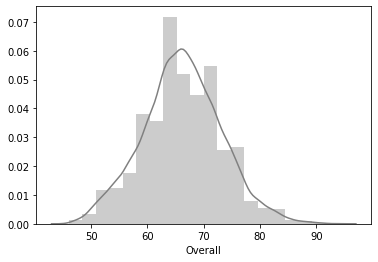

In [30]:
sns.distplot(a=dfa['Overall'],bins=20,kde=True,color="grey")
plt.show()

### 2. Generate pair plots for the following variables:
    Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

In [31]:
columns = ["Overall", "Height", "Weight", "Release Clause"]

In [32]:
dfa.loc[:,columns].dtypes

Overall             int64
Height            float64
Weight             object
Release Clause     object
dtype: object

Weight and release clause are string type so not considering 

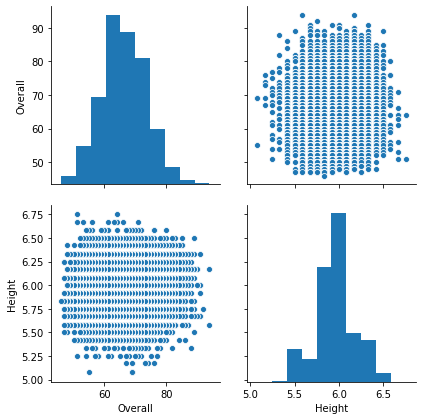

In [33]:
sns.pairplot(data=dfa.loc[:,columns[:2]],height=3)
plt.show()

### 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [34]:
top_20 = dfa.query('`Contract Valid Until` == 2020').sort_values(by='Overall',ascending=False).head(20)
top_20

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Position,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,260000.0,Right,4.0,3.0,1.0,Medium/ Medium,Lean,GK,2011,2020,6.33,168lbs,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,67000000.0,420000.0,Right,4.0,4.0,4.0,High/ High,Lean,RCM,2012,2020,5.67,146lbs,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,51000000.0,380000.0,Right,4.0,3.0,3.0,High/ Medium,Normal,RCB,2005,2020,6.00,181lbs,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,93000000.0,340000.0,Right,4.0,4.0,4.0,High/ Medium,Normal,LF,2012,2020,5.67,163lbs,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,60000000.0,285000.0,Left,4.0,2.0,4.0,High/ Medium,Normal,LCM,2010,2020,5.67,148lbs,84.0,76.0,54.0,93.0,82.0,89.0,82.0,77.0,87.0,94.0,70.0,64.0,92.0,90.0,90.0,72.0,64.0,78.0,52.0,75.0,57.0,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,60000000.0,200000.0,Right,4.0,4.0,3.0,High/ High,Lean,LS,2013,2020,6.08,170lbs,70.0,89.0,89.0,78.0,90.0,80.0,77.0,76.0,52.0,82.0,75.0,76.0,77.0,91.0,59.0,87.0,88.0,92.0,78.0,79.0,84.0,48.0,93.0,77.0,85.0,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,27000000.0,215000.0,Left,4.0,3.0,2.0,Medium/ High,Normal,LCB,2005,2020,6.17,187lbs,58.0,33.0,83.0,59.0,45.0,58.0,60.0,31.0,59.0,57.0,63.0,75.0,54.0,82.0,55.0,78.0,89.0,65.0,89.0,49.0,92.0,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,5.0,4.0,High/ Medium,Lean,CAM,2013,2020,5.92,168lbs,88.0,80.0,52.0,91.0,77.0,84.0,86.0,87.0,88.0,91.0,75.0,73.0,79.0,88.0,81.0,84.0,50.0,92.0,58.0,89.0,46.0,56.0,83.0,91.0,67.0,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,24000000.0,165000.0,Right,4.0,3.0,2.0,Medium/ High,Normal,RCB,2012,2020,6.00,181lbs,60.0,38.0,81.0,80.0,63.0,62.0,61.0,64.0,80.0,80.0,70.0,72.0,68.0,82.0,68.0,71.0,90.0,74.0,82.0,68.0,76.0,89.0,59.0,72.0,60.0,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,45000000.0,135000.0,Right,3.0,4.0,4.0,High/ Low,Normal,RF,2013,2020,5.58,134lbs,77.0,86.0,35.0,82.0,70.0,91.0,82.0,79.0,74.0,89.0,93.0,85.0,94.0,88.0,92.0,80.0,60.0,75.0,42.0,81.0,59.0,36.0,87.0,83.0,79.0,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


### 4. What would the average wage for this set of players be?

In [35]:
top_20['Wage'] = top_20['Wage'].astype('float')
top_20['Wage'].mean()

205450.0

### 5. What is the average age?

In [36]:
age = dfa['Age']
int(age.mean()), age.median() 

(25, 25.0)

In [37]:
top_20['Age'].mean()

30.65

### 6. Is there a correlation between the Overall rating and Value for these players?

In [38]:
top_20['Value'] = top_20['Value'].astype('float')

top_20.corr().loc['Overall','Value']

0.7867166042074153

There is a high correlation between the Overall rating and Value.

### 7. Generate tables containing the top 5 players by Overall rating for each unique position.

In [39]:
top_5 = dfa.groupby(by='Position')['Position','Overall'].head(5)
top_5.sort_values(['Position','Overall'],ascending=[True,False])

,Position,Overall
17,CAM,89
31,CAM,88
61,CAM,86
66,CAM,86
74,CAM,86
...,...,...
1,ST,94
10,ST,90
16,ST,89
23,ST,89


### 8. Are there any players appearing in more than one Table. Please point out such players.

In [40]:
names = dfa['Name'].value_counts()
names[names > 1]

J. Rodríguez    9
Paulinho        7
Felipe          6
J. Valencia     6
J. Gómez        6
               ..
M. Orozco       2
B. Figueroa     2
P. Aguilar      2
Susaeta         2
C. Wood         2
Name: Name, Length: 670, dtype: int64

### 9. What is the average wage one can expect to pay for the top 5 in every position?

In [41]:
dfa['Wage'] = dfa['Wage'].astype('float')
dfa = dfa.sort_values(by='Overall')
top_5 = dfa.groupby('Position')
top_5.mean()['Wage']

Position
CAM    10158.134243
CB      7671.922377
CDM     9412.371134
CF     10060.606061
CM      8143.416928
GK      6717.813978
LAM    11700.000000
LB      8794.117647
LCB    11768.844221
LCM    13716.713881
LDM    10660.714286
LF     44666.666667
LM      9516.798419
LS     14108.695652
LW     12997.041420
LWB     8631.578947
RAM    19095.238095
RB      8594.662219
RCB    12868.292683
RCM    14397.183099
RDM    12109.649123
RF     60923.076923
RM      9345.401174
RS     13664.804469
RW     14375.384615
RWB     8404.761905
ST      9675.155925
Name: Wage, dtype: float64